### Summary
작성일 : 19.8.28

<목적>  
현재 D1은 ProductCD보다 좀 더 세분화된 상품군으로 추정 중이며, distinct D1 + card1 + ProductCD의 feature로 스코어 향상 확인  
distinct D1 vs D2~D15와의 관계를 통해 Fraud ratio와 함께 움직이는 특성들을 추출하고, 이를 반영하여 더욱 퍼포먼스를 올려볼 예정(희망)  
***참고) distinct D1 : TransactionDT에서 D1을 뺀 값으로 D1이 세분화된 상품군이라는 가정하에 동일한 상품군을 나타내는 변수*** 

<방법>  
1) D1 + card1 + ProductCD 조합으로 동일한 상품군/고객군 후보를 추출  
2) x = day, y = isFraud로 density plot 작성  
3) x = day, y = D2~D15의 boxplot 작성  
4) 2), 3) 비교  

<결론>

 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc, datetime, time
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
train_idf = pd.read_csv("/Users/jeong/downloads/IEEE/input/train_identity.csv")

test_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/test_transaction.csv")
test_idf = pd.read_csv("/Users/jeong/downloads/IEEE/input/test_identity.csv")

tr = pd.merge(train_trans, train_idf, on = 'TransactionID', how = 'left')
te = pd.merge(test_trans, test_idf, on = 'TransactionID', how = 'left')

del train_trans, train_idf, test_trans, test_idf

In [3]:
import datetime
start_date = datetime.datetime.strptime('2017.11.30', '%Y.%m.%d')
tr['timeblock'] = tr['TransactionDT'].apply(lambda x: datetime.timedelta(seconds = x) + start_date ) 
te['timeblock'] = te['TransactionDT'].apply(lambda x: datetime.timedelta(seconds = x) + start_date ) 

In [17]:
tr['day'] = tr['timeblock'].dt.date
te['day'] = te['timeblock'].dt.date

In [4]:
tr['D8'] = round(tr['D8'] - tr['D9'], 0)
te['D8'] = round(te['D8'] - te['D9'], 0)

d1 과 나머지 변수들의 차이를 구함

In [112]:
tr['D2_D1_diff'] = tr['D1'] - tr['D2']
te['D2_D1_diff'] = te['D1'] - te['D2']

tr['D3_D1_diff'] = tr['D1'] - tr['D3']
te['D3_D1_diff'] = te['D1'] - te['D3']

tr['D4_D1_diff'] = tr['D1'] - tr['D4']
te['D4_D1_diff'] = te['D1'] - te['D4']

tr['D5_D1_diff'] = tr['D1'] - tr['D5']
te['D5_D1_diff'] = te['D1'] - te['D5']

tr['D6_D1_diff'] = tr['D1'] - tr['D6']
te['D6_D1_diff'] = te['D1'] - te['D6']

tr['D7_D1_diff'] = tr['D1'] - tr['D7']
te['D7_D1_diff'] = te['D1'] - te['D7']

tr['D8_D1_diff'] = tr['D1'] - tr['D8']
te['D8_D1_diff'] = te['D1'] - te['D8']

tr['D10_D1_diff'] = tr['D1'] - tr['D10']
te['D10_D1_diff'] = te['D1'] - te['D10']

tr['D11_D1_diff'] = tr['D1'] - tr['D11']
te['D11_D1_diff'] = te['D1'] - te['D11']

tr['D12_D1_diff'] = tr['D1'] - tr['D12']
te['D12_D1_diff'] = te['D1'] - te['D12']

tr['D13_D1_diff'] = tr['D1'] - tr['D13']
te['D13_D1_diff'] = te['D1'] - te['D13']

tr['D14_D1_diff'] = tr['D1'] - tr['D14']
te['D14_D1_diff'] = te['D1'] - te['D14']

tr['D15_D1_diff'] = tr['D1'] - tr['D15']
te['D15_D1_diff'] = te['D1'] - te['D15']

In [7]:
tr['D1_make_day'] = ((tr['timeblock'] - pd.to_timedelta(tr['D1'],'d')).dt.date).astype('str')
te['D1_make_day'] = ((te['timeblock'] - pd.to_timedelta(te['D1'],'d')).dt.date).astype('str')

잠재 동일 상품군

In [49]:
tr['Product_id'] = tr['ProductCD'].astype('str')+ "_" + tr['D1_make_day'] 
te['Product_id'] = te['ProductCD'].astype('str')+ "_" + te['D1_make_day']

In [50]:
ex = pd.DataFrame(tr['Product_id'].value_counts()).reset_index()
ex.columns = ['ProductId', 'cnt']

In [51]:
id2 = ex['ProductId']

In [113]:
i = 506  
temp = tr[tr['Product_id'] == id2[i]]
print(id2[i])
print(temp.shape[0])
print(temp.isFraud.mean())
print(temp.D2_D1_diff.isnull().sum())
print(temp.D3_D1_diff.isnull().sum())
print(temp.D4_D1_diff.isnull().sum())
print(temp.D5_D1_diff.isnull().sum())
print(temp.D6_D1_diff.isnull().sum())
print(temp.D7_D1_diff.isnull().sum())
print(temp.D8_D1_diff.isnull().sum())
print(temp.D10_D1_diff.isnull().sum())
print(temp.D11_D1_diff.isnull().sum())
print(temp.D12_D1_diff.isnull().sum())
print(temp.D13_D1_diff.isnull().sum())
print(temp.D14_D1_diff.isnull().sum())
print(temp.D15_D1_diff.isnull().sum())

C_2018-04-02
310
0.19032258064516128
260
206
12
157
12
157
174
13
310
9
57
65
9


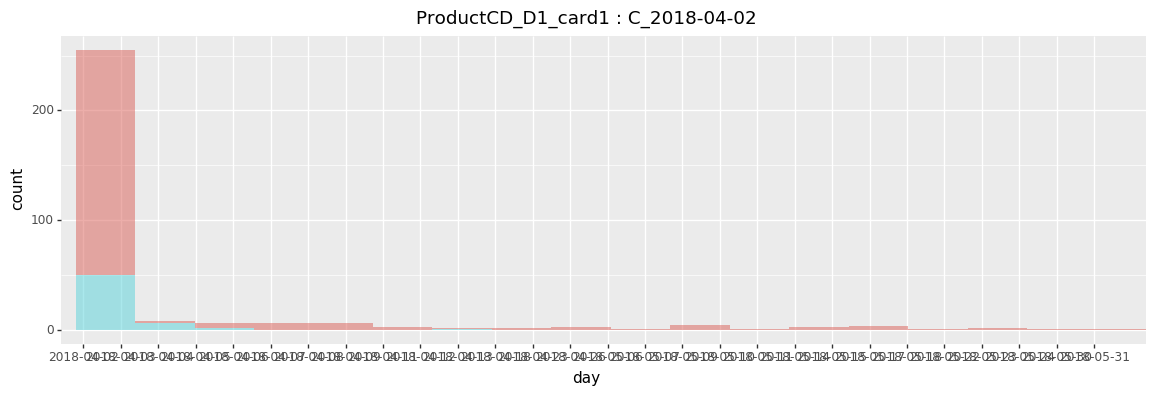

<ggplot: (-9223372029225171491)>


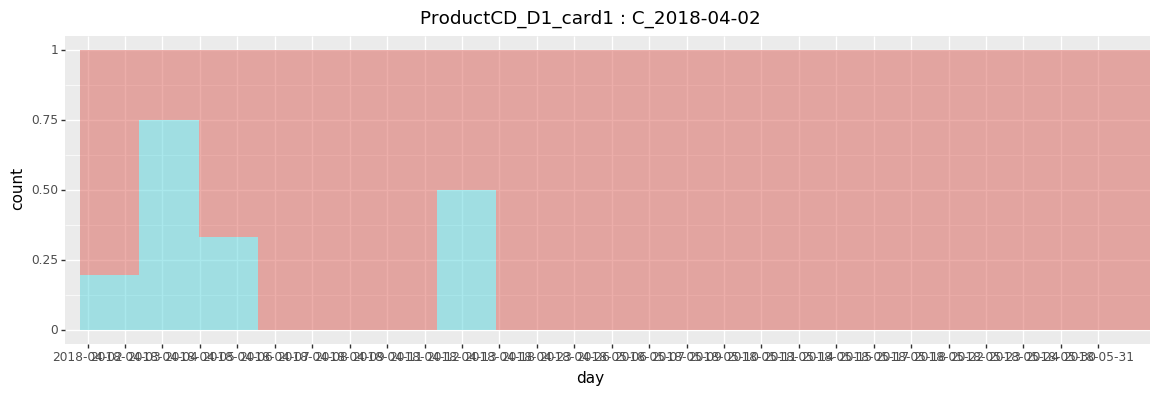

<ggplot: (7571994439)>


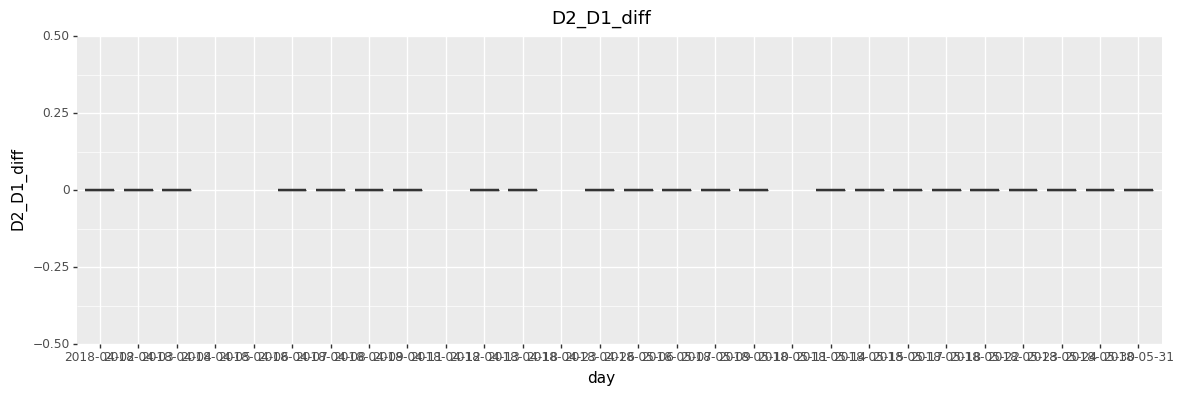

<ggplot: (-9223372029295329781)>


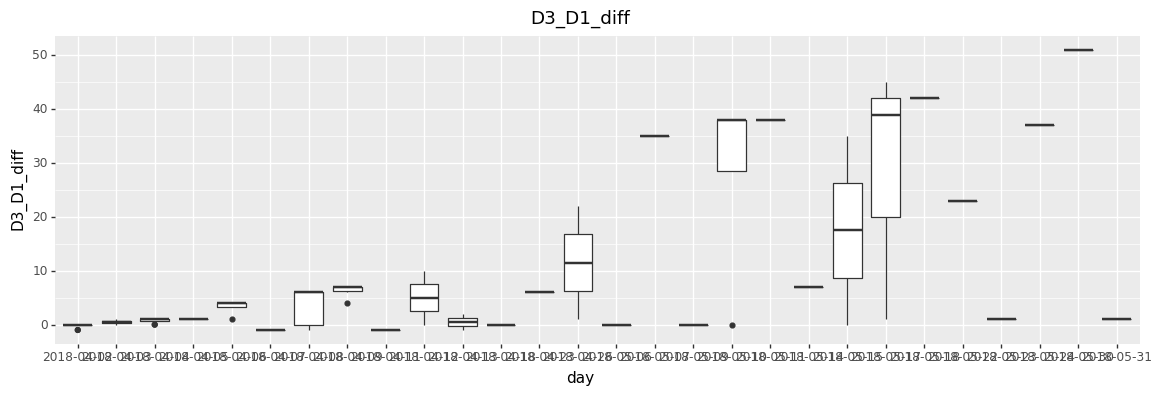

<ggplot: (7555413263)>


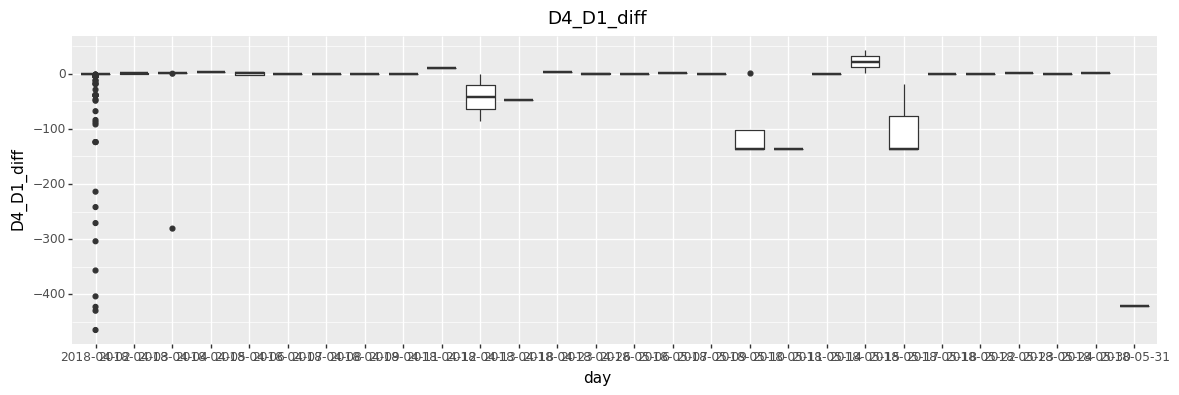

<ggplot: (7566889101)>


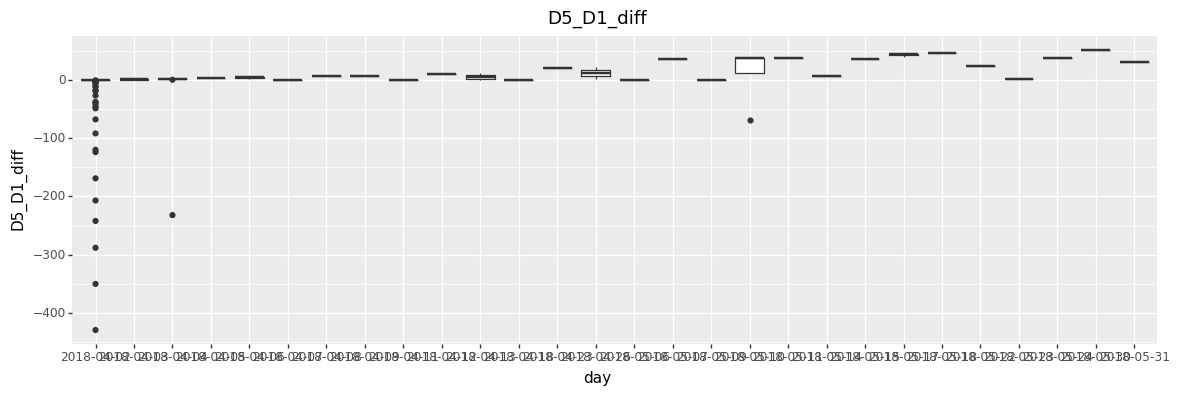

<ggplot: (7555442012)>


In [114]:
p = ggplot(temp, aes('day', fill = 'factor(isFraud)')) + geom_histogram(alpha  = 0.5, show_legend=False) + theme(figure_size=(14, 4)) + ggtitle("ProductCD_D1_card1 : "+ id2[i])
print(p)
p = ggplot(temp, aes('day', fill = 'factor(isFraud)')) + geom_histogram(alpha  = 0.5, position = 'fill', show_legend=False) + theme(figure_size=(14, 4)) + ggtitle("ProductCD_D1_card1 : "+ id2[i])
print(p)
p = ggplot(temp, aes('day', y = 'D2_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D2_D1_diff')
print(p)
p = ggplot(temp, aes('day', y = 'D3_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D3_D1_diff')
print(p)
p = ggplot(temp, aes('day', y = 'D4_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)
p = ggplot(temp, aes('day', y = 'D5_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D5_D1_diff')
print(p)

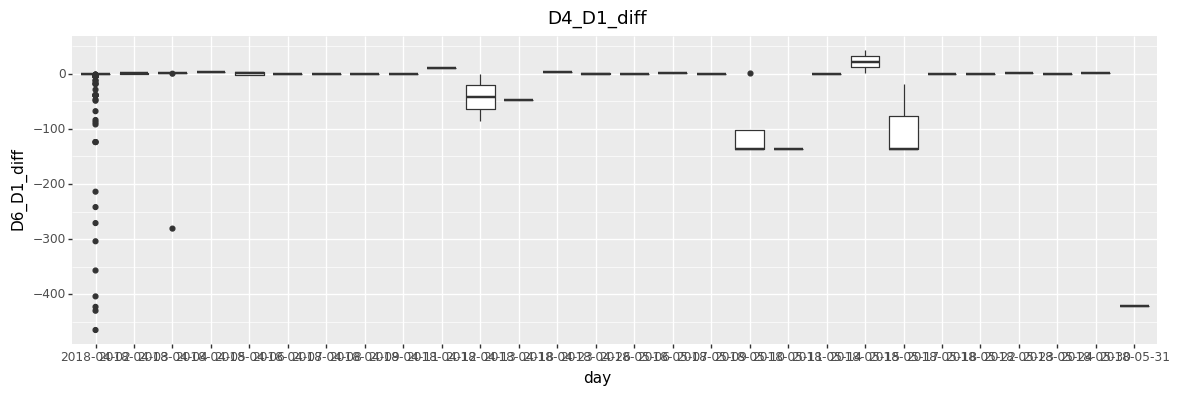

<ggplot: (-9223372029284243631)>


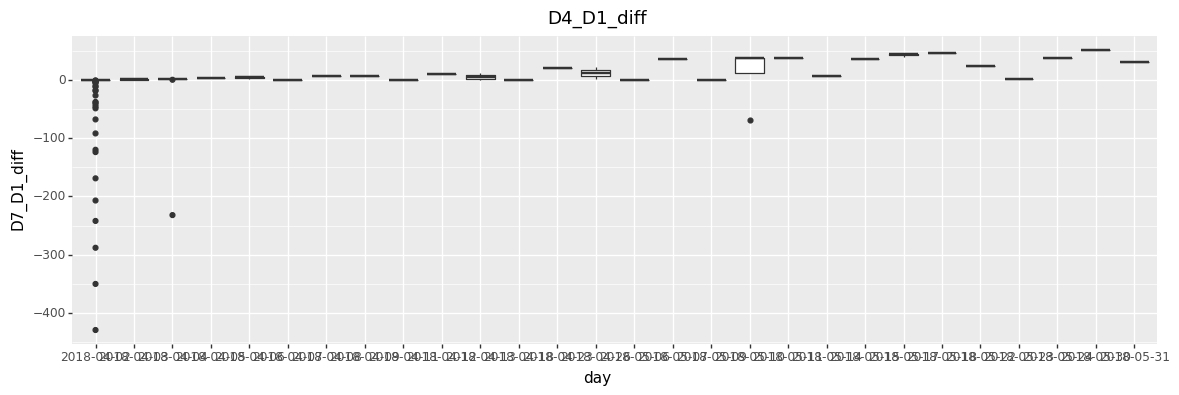

<ggplot: (-9223372029277955868)>


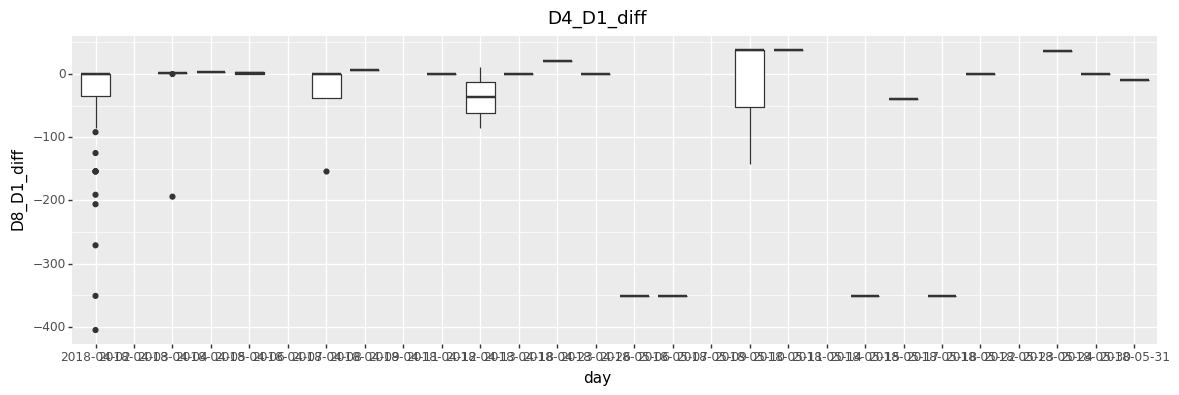

<ggplot: (-9223372029286804385)>


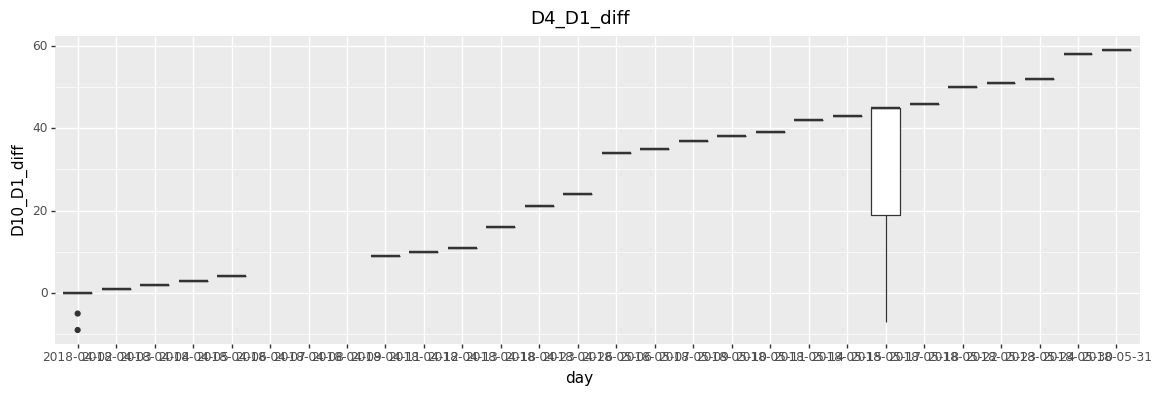

<ggplot: (7567803151)>


ValueError: No objects to concatenate

In [115]:
p = ggplot(temp, aes('day', y = 'D6_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D7_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D8_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D10_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D11_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D12_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D13_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D14_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

p = ggplot(temp, aes('day', y = 'D15_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)

In [86]:
print(temp.D10_D1_diff.isnull().sum())

2252

(463, 444)


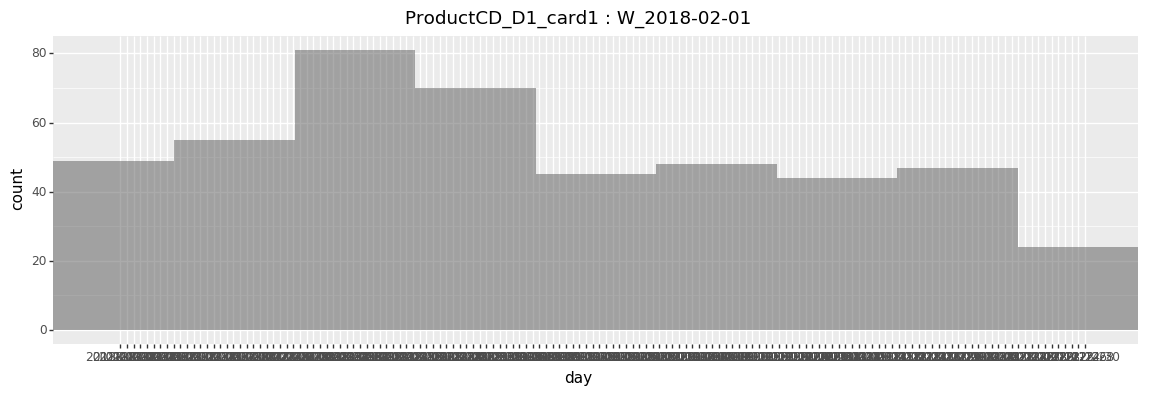

<ggplot: (-9223372029287249306)>


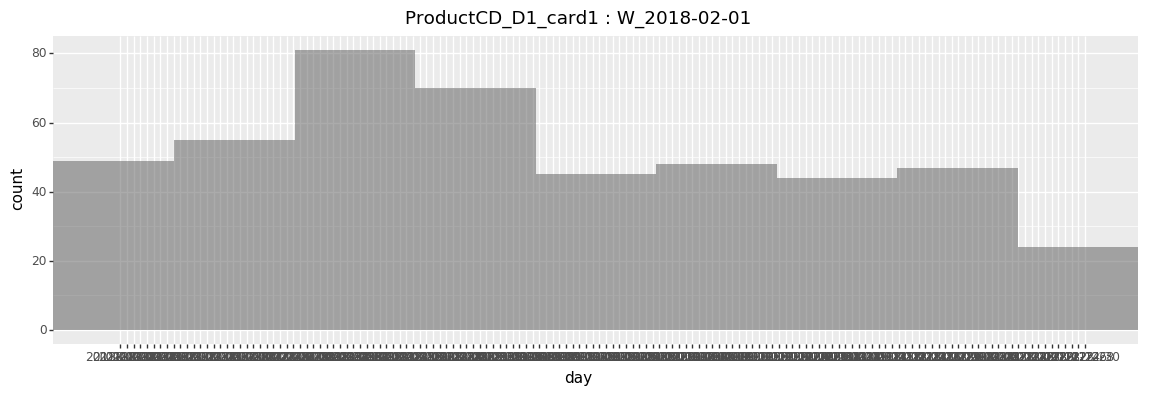

<ggplot: (-9223372029275279577)>


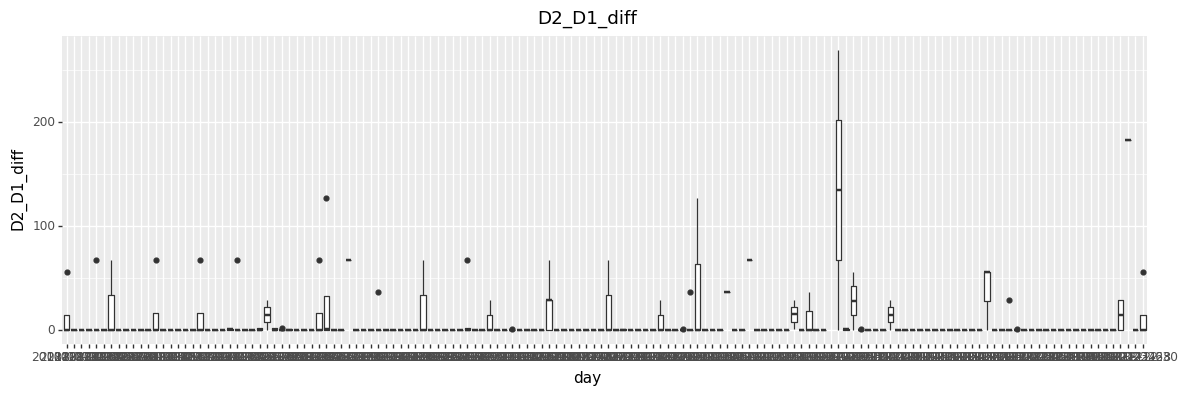

<ggplot: (-9223372029285504245)>


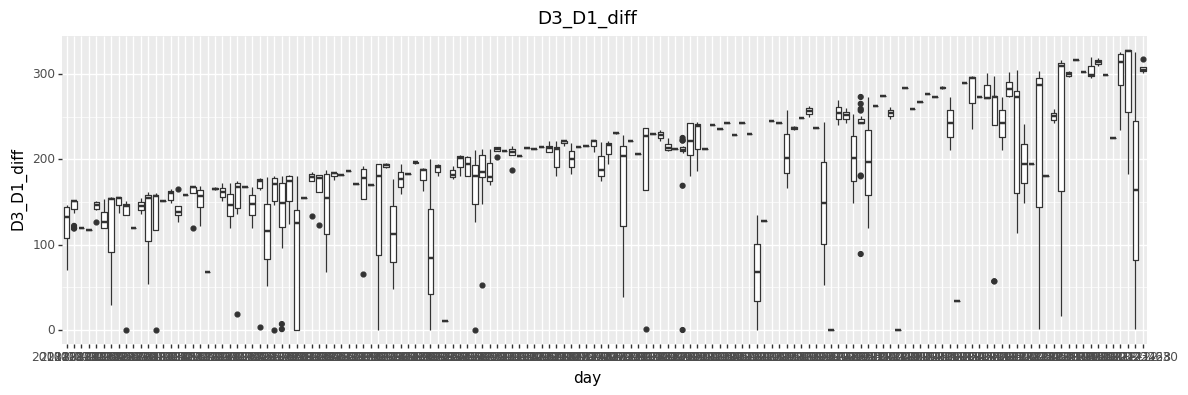

<ggplot: (-9223372029286747525)>


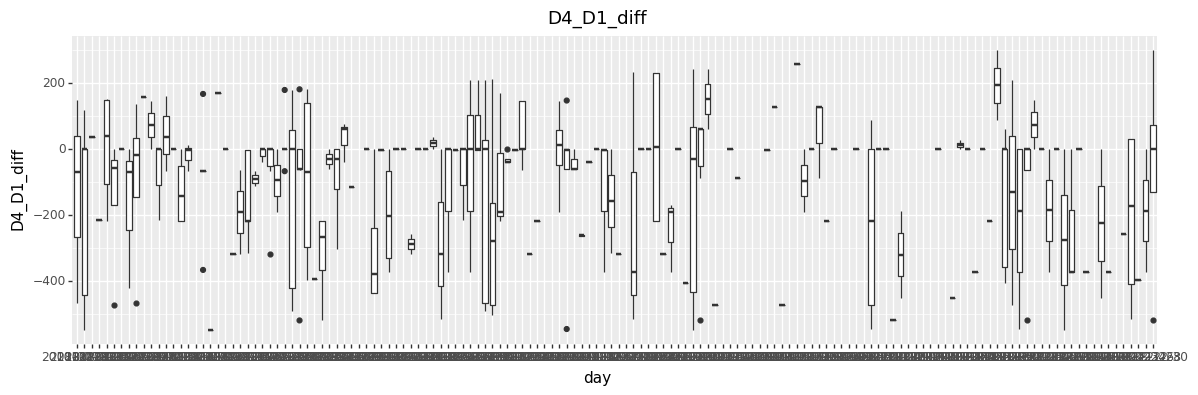

<ggplot: (-9223372029289979872)>


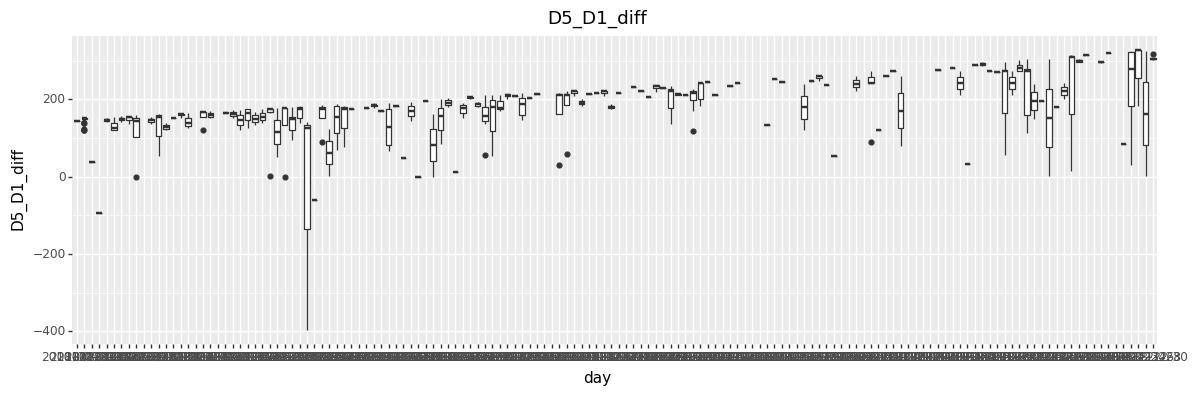

<ggplot: (-9223372029287059168)>


In [70]:
temp2 = te[te['Product_id'] == id2[i]]
print(temp2.shape)
p = ggplot(temp2, aes('day')) + geom_histogram(alpha  = 0.5, show_legend=False) + theme(figure_size=(14, 4)) + ggtitle("ProductCD_D1_card1 : "+ id2[i])
print(p)
p = ggplot(temp2, aes('day')) + geom_histogram(alpha  = 0.5, show_legend=False) + theme(figure_size=(14, 4)) + ggtitle("ProductCD_D1_card1 : "+ id2[i])
print(p)
p = ggplot(temp2, aes('day', y = 'D2_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D2_D1_diff')
print(p)
p = ggplot(temp2, aes('day', y = 'D3_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D3_D1_diff')
print(p)
p = ggplot(temp2, aes('day', y = 'D4_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D4_D1_diff')
print(p)
p = ggplot(temp2, aes('day', y = 'D5_D1_diff')) + geom_boxplot() + theme(figure_size=(14, 4)) + ggtitle('D5_D1_diff')
print(p)